In [2]:
!nvidia-smi

Mon Mar 31 13:23:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [4]:
# having a problem if didn't install it.
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [5]:
# Pip install method (recommended)

!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version()
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Common-Pills-in-PH-Detection-4 in yolov8:: 100%|██████████| 19218/19218 [00:02<00:00, 7503.17it/s] 


In [8]:
  #training with 45 epochs
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.yaml data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/kaggle/working
Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/Common-Pills-in-PH-Detection-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

In [9]:
#checking the graphs and other eval metrics
!ls {HOME}/runs/detect/train/

args.yaml					  train_batch16840.jpg
confusion_matrix_normalized.png			  train_batch16841.jpg
confusion_matrix.png				  train_batch16842.jpg
events.out.tfevents.1743427522.98ed1581b78f.90.0  train_batch1.jpg
F1_curve.png					  train_batch2.jpg
labels_correlogram.jpg				  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
P_curve.png					  val_batch1_labels.jpg
PR_curve.png					  val_batch1_pred.jpg
R_curve.png					  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/Common-Pills-in-PH-Detection-4/valid/labels.cache.
val: WARNING ⚠️ /kaggle/working/Common-Pills-in-PH-Detection-4/valid/images/unknown-50uvr9f7-ingestion-5bdf6498b7-vc5q7_jpg.rf.12441b0230590040bc42d0caedd236f1.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/working/Common-Pills-in-PH-Detection-4/valid/images/unknown-50uvr9f7-ingestion-5bdf6498b7-vc5q7_jpg.rf.92a190a547872c6aa1a0ea343d6ce4e6.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1921       1938      0.958      0.991      0.972      0.923
                 Advil        234        234      0.997          1      0.995      0.977
                Alaxan        123        123      0.995          1      0.995      0.863
             Amplodin

In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs

image 1/960 /kaggle/working/Common-Pills-in-PH-Detection-4/test/images/DSC_0036_JPG.rf.9298a2769970b5b2b9f4a9cdb8862dc8.jpg: 800x800 1 Alaxan, 23.1ms
image 2/960 /kaggle/working/Common-Pills-in-PH-Detection-4/test/images/DSC_0040_JPG.rf.d872ff6331339d1887126a35f367a8e5.jpg: 800x800 1 Alaxan, 22.9ms
image 3/960 /kaggle/working/Common-Pills-in-PH-Detection-4/test/images/DSC_0055_JPG.rf.7a71be56b3f1efd67fe327a893786ccb.jpg: 800x800 1 Alaxan, 22.9ms
image 4/960 /kaggle/working/Common-Pills-in-PH-Detection-4/test/images/DSC_0063_JPG.rf.cfecf32373398b195d1380ec7a8850b4.jpg: 800x800 1 Alaxan, 22.9ms
image 5/960 /kaggle/working/Common-Pills-in-PH-Detection-4/test/images/DSC_0065_JPG.rf.2c5ebcda21c473d1c733831abc4e25ff.jpg: 800x800 1 Alaxan, 22.8ms
image 6/960 /kaggle/working/Common-Pills-in-PH-Detection-4/test/images/DSC_0067_JPG

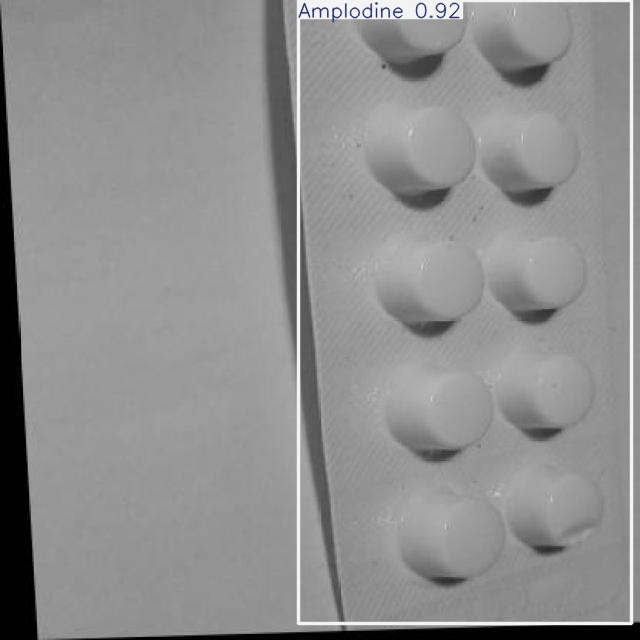

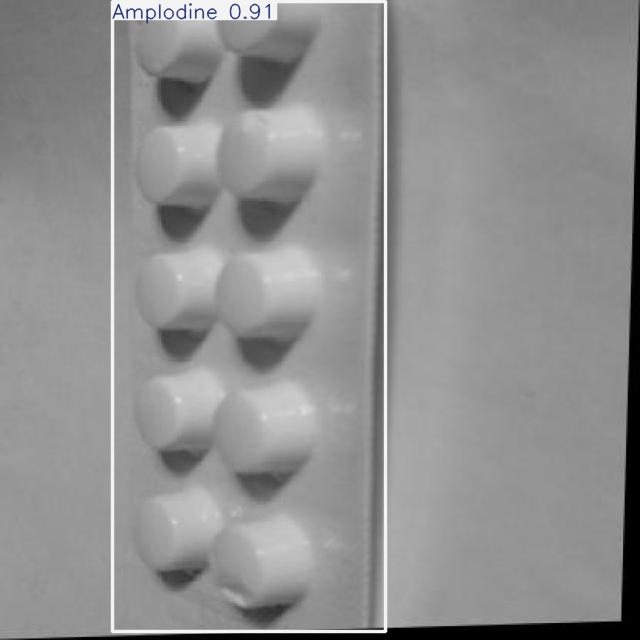

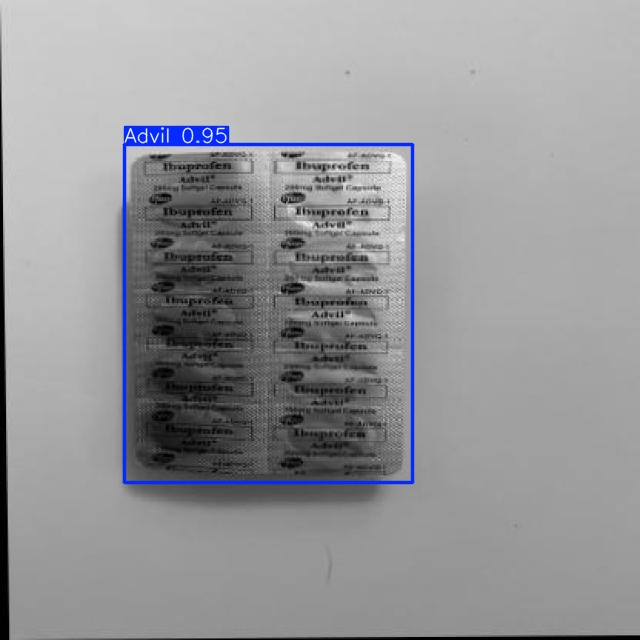

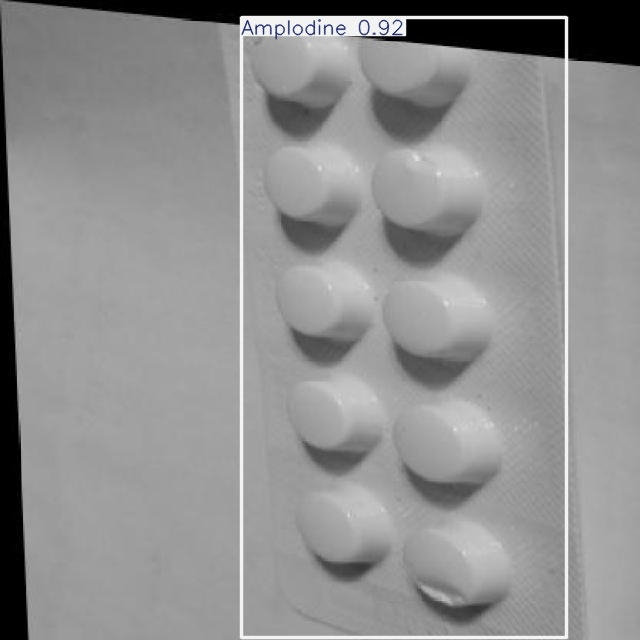

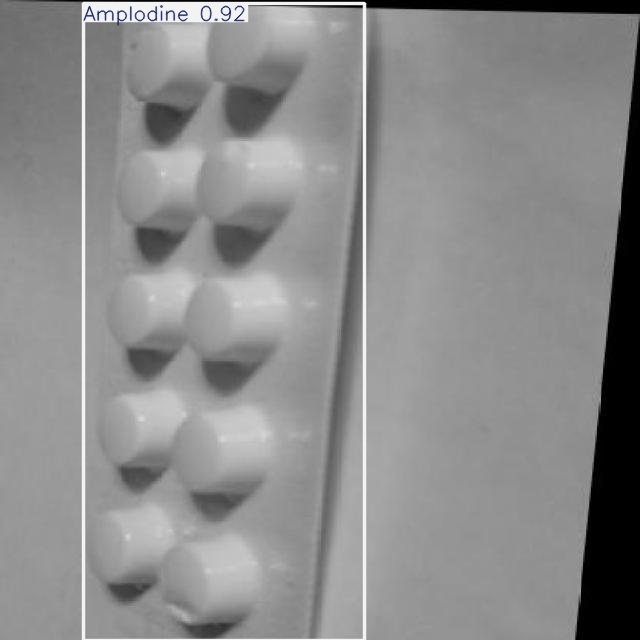

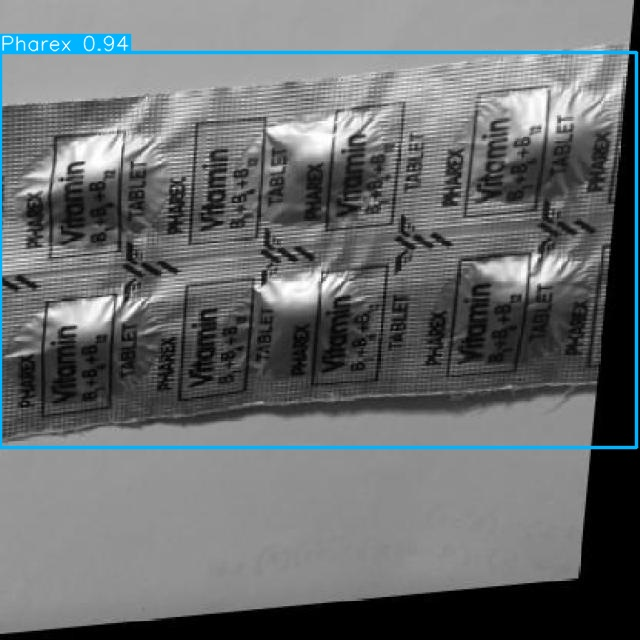

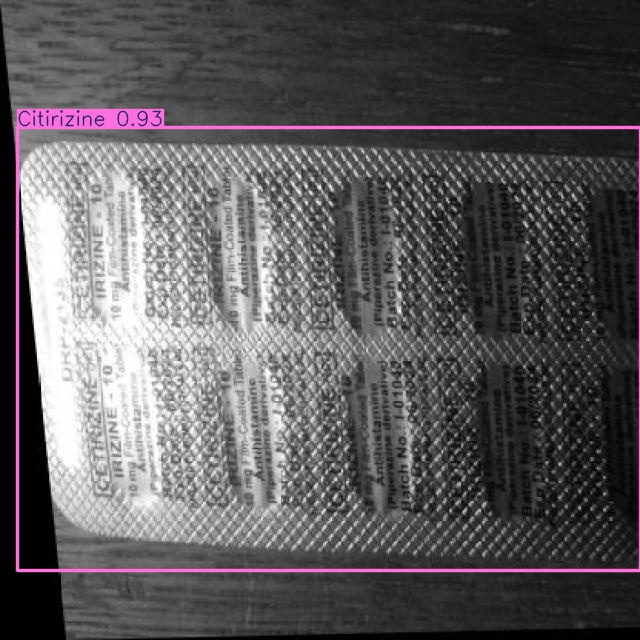

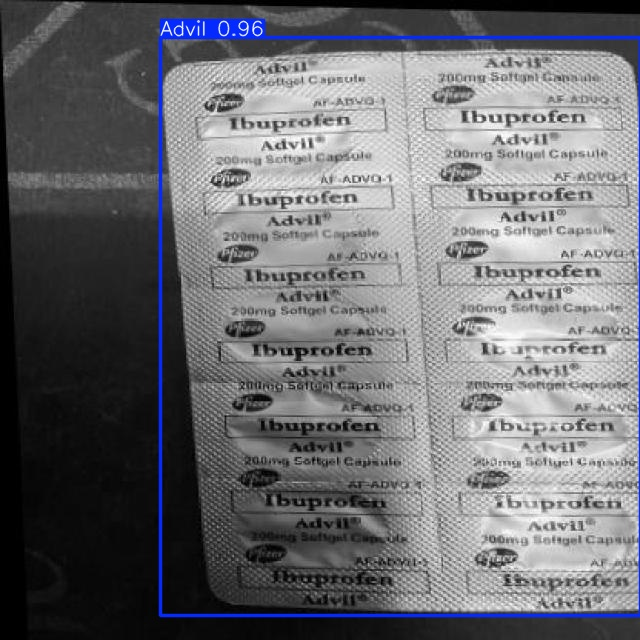

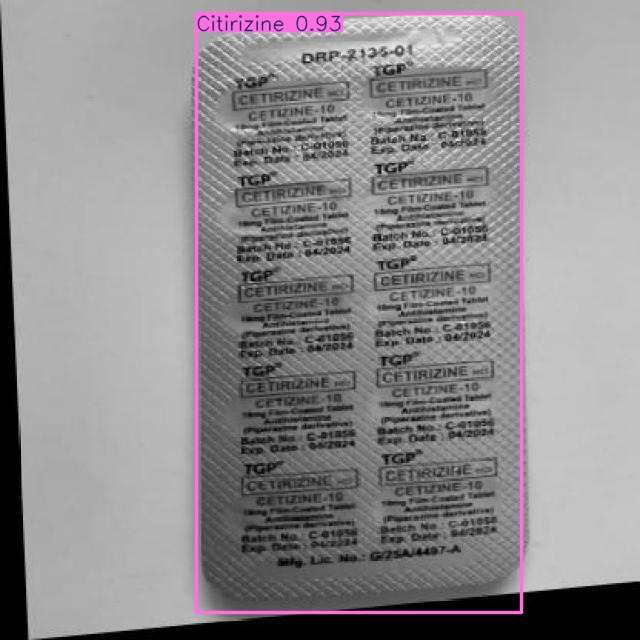

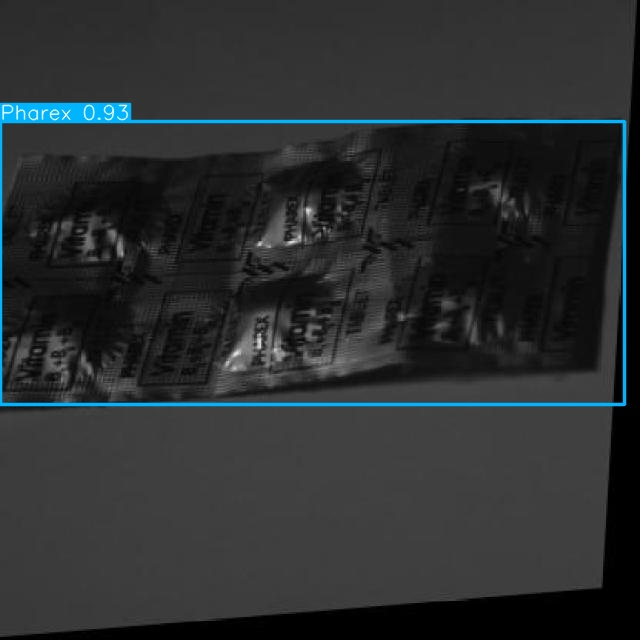

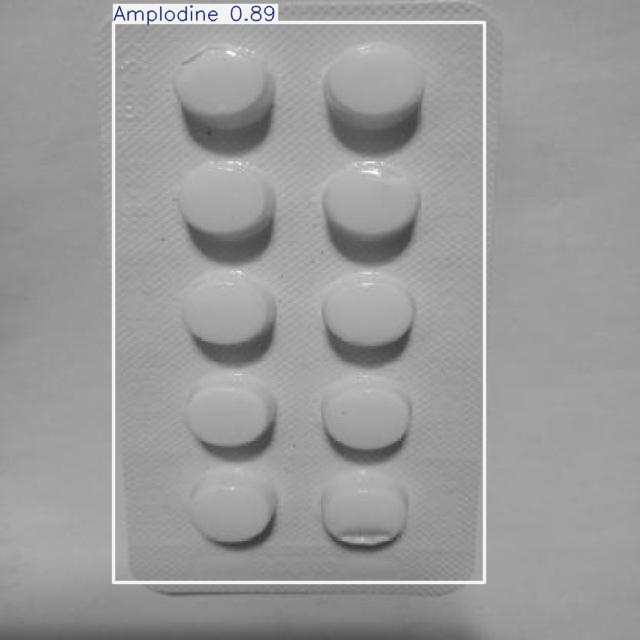

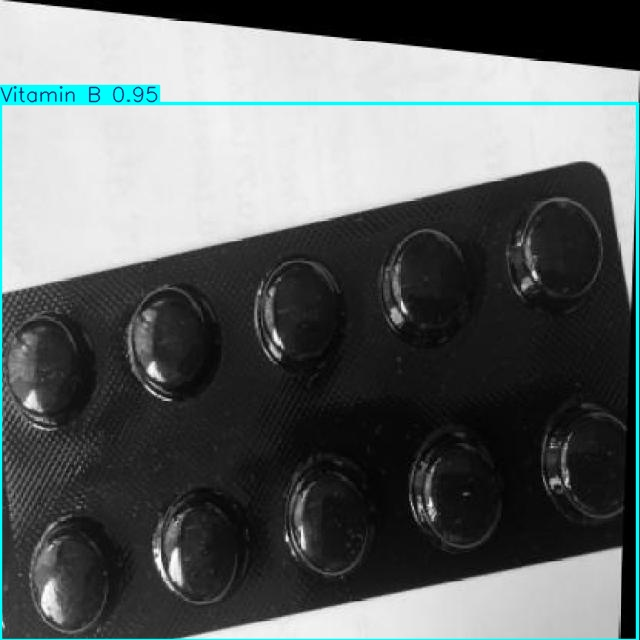

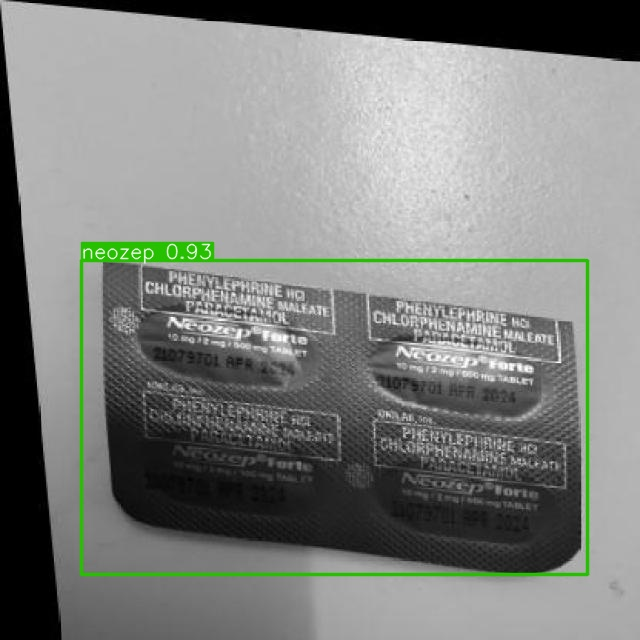

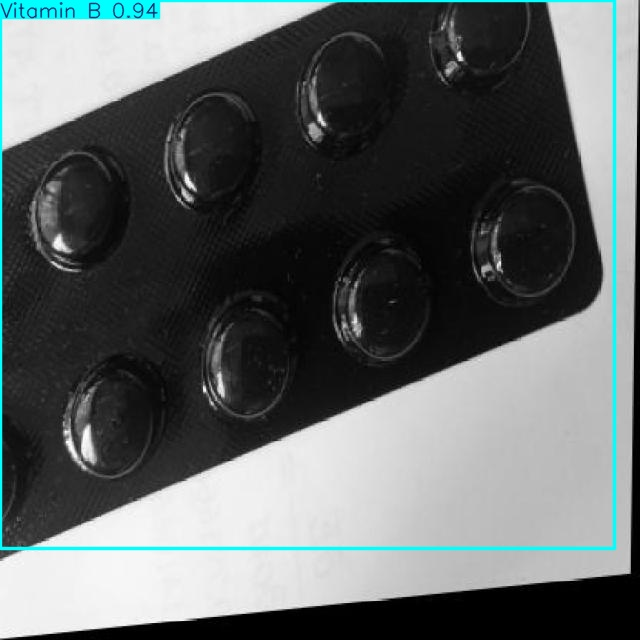

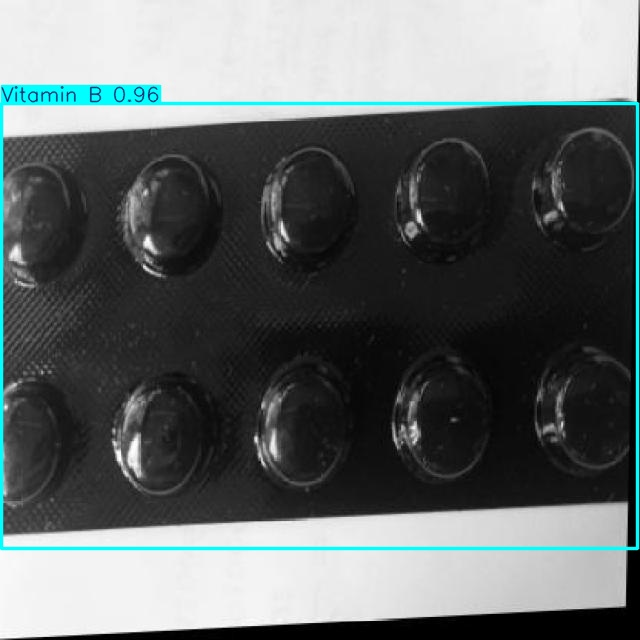

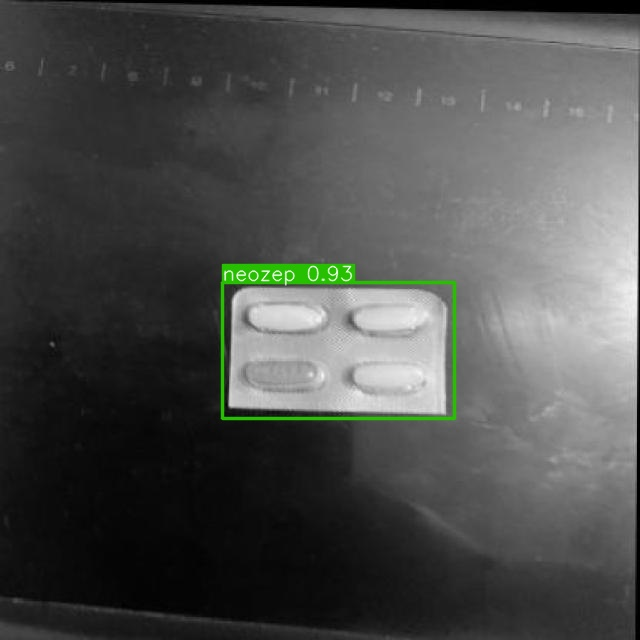

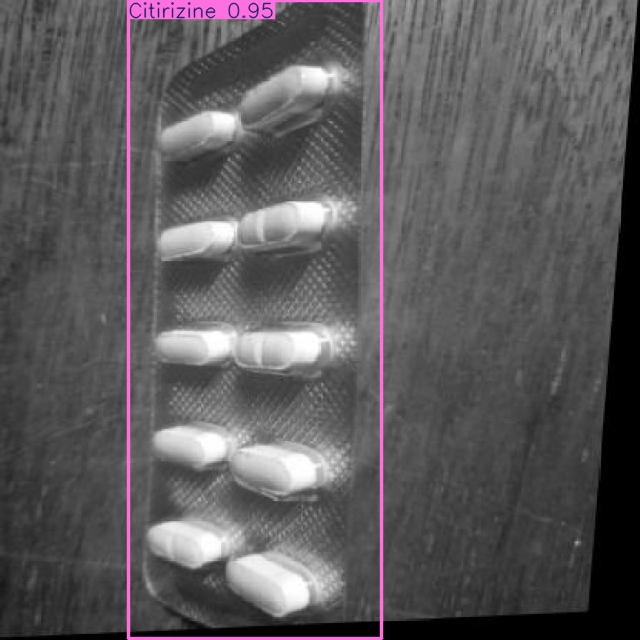

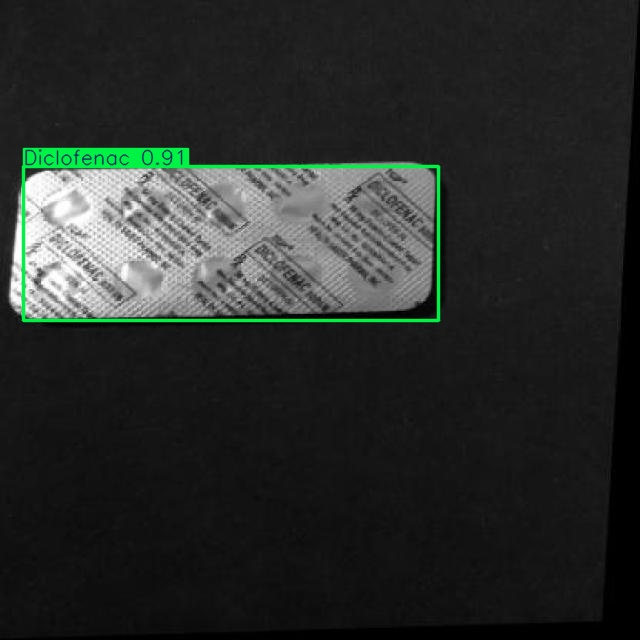

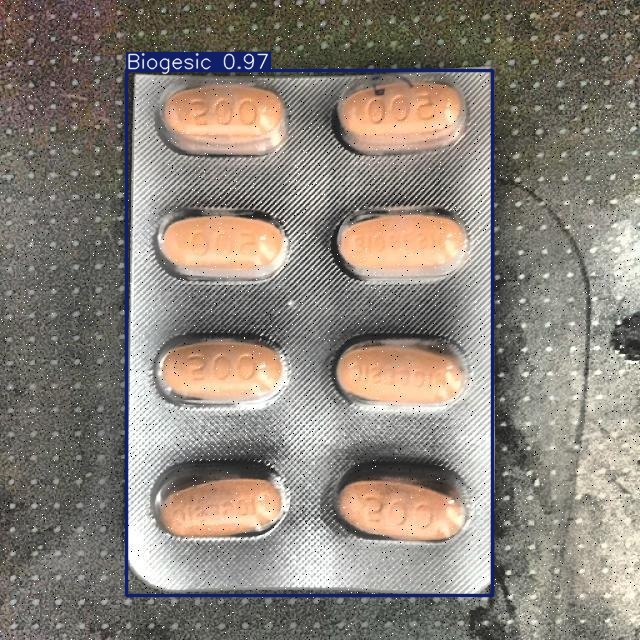

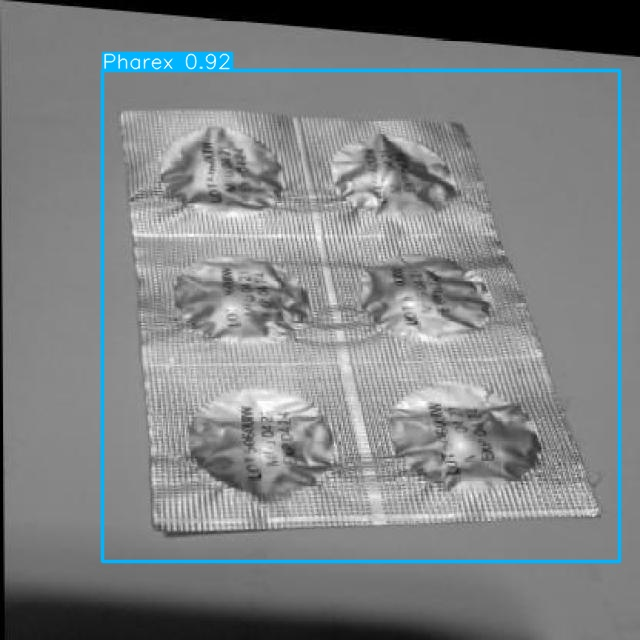

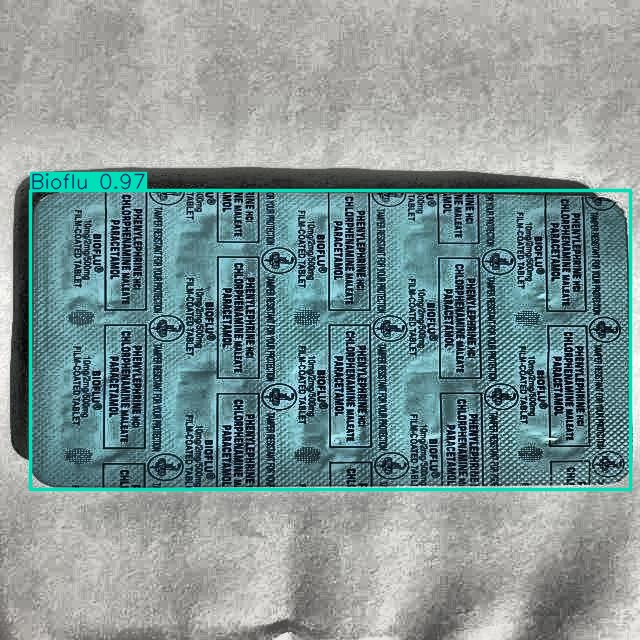

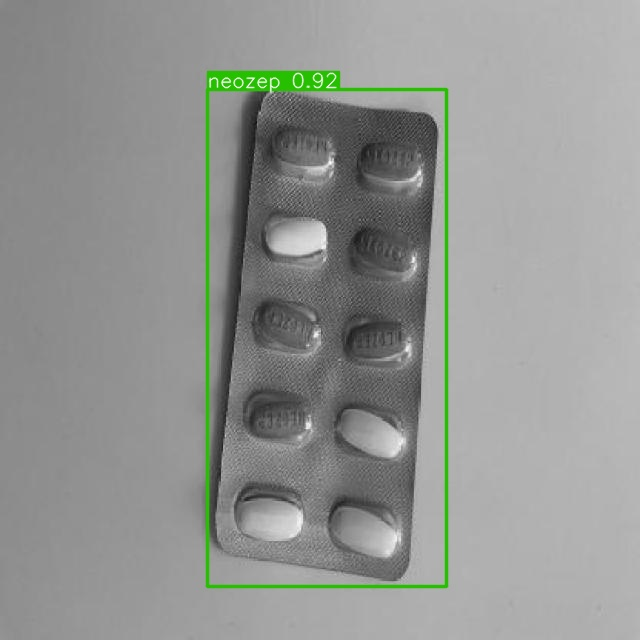

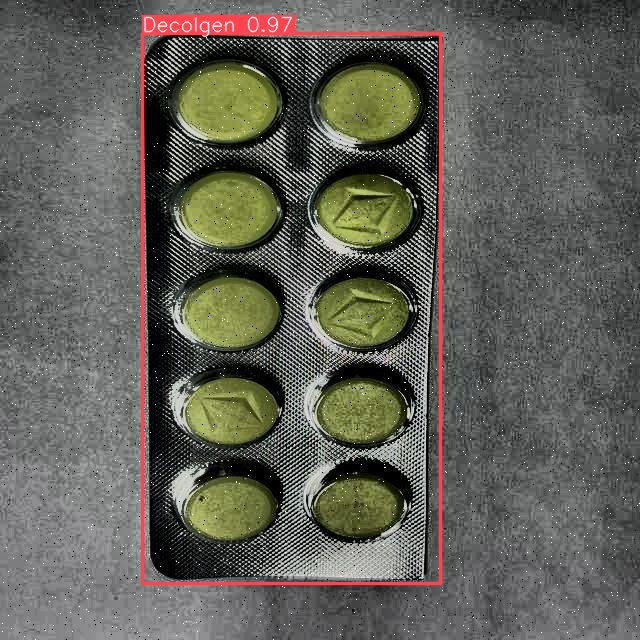

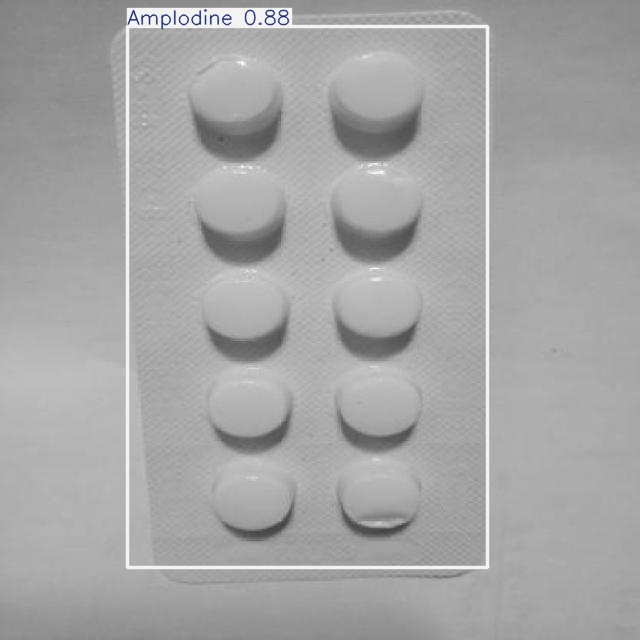

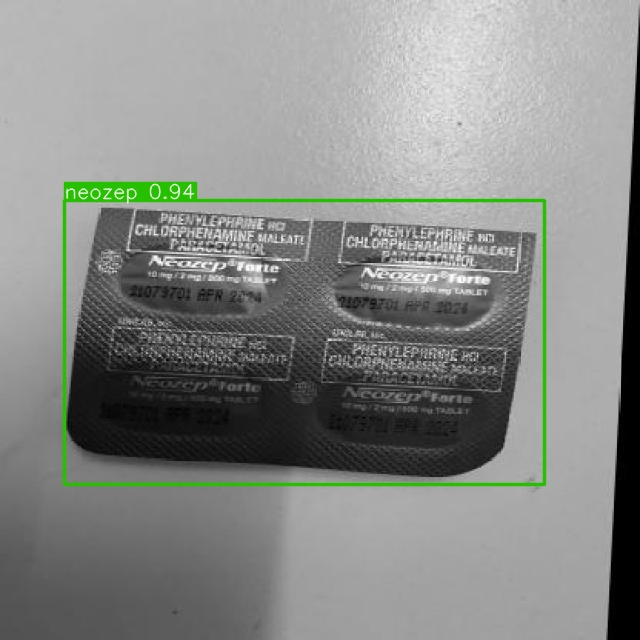

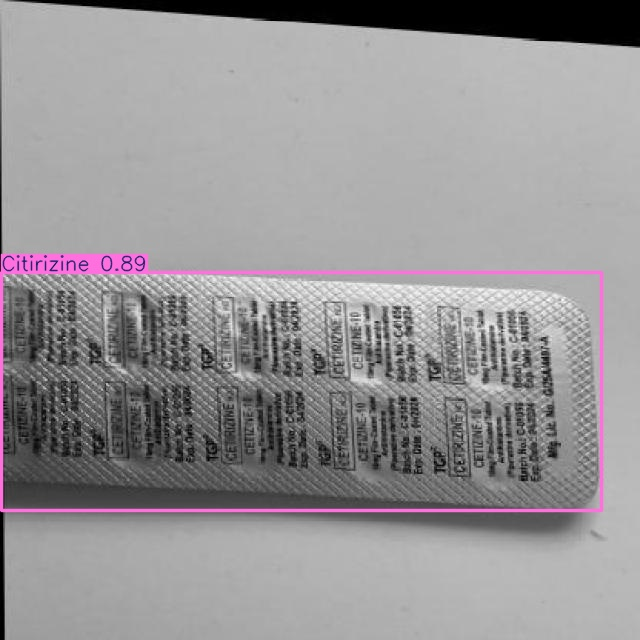

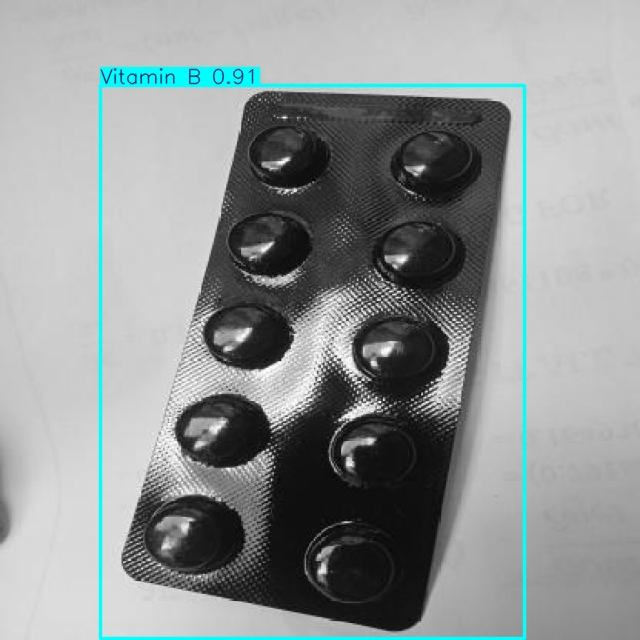

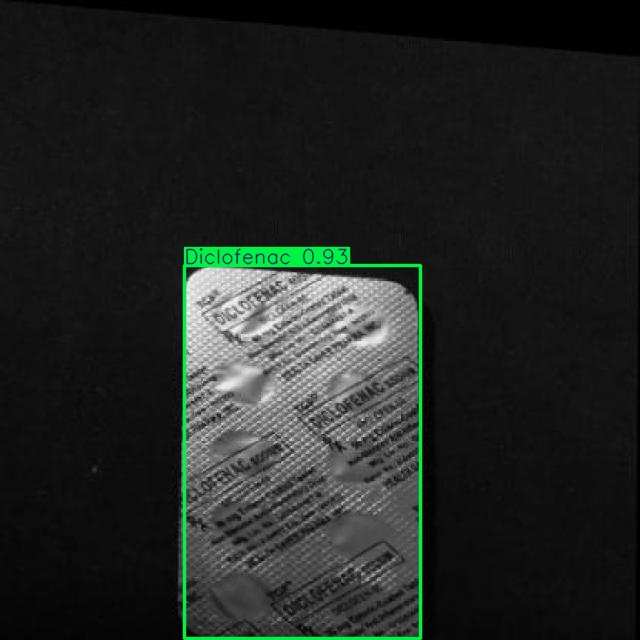

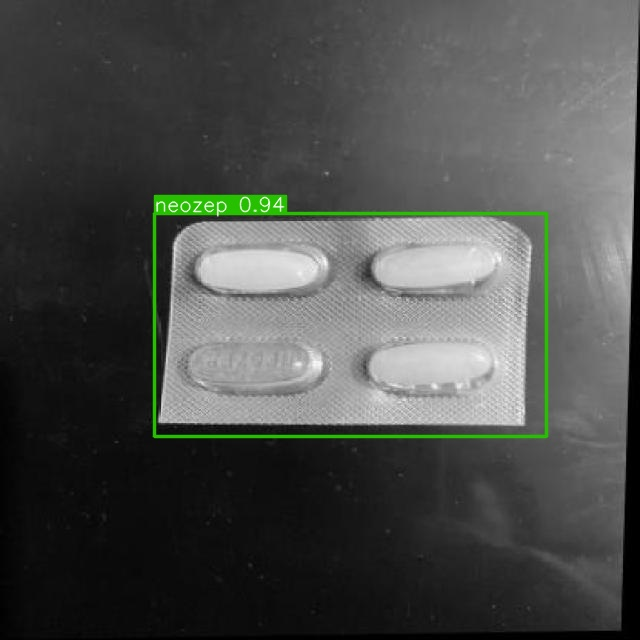

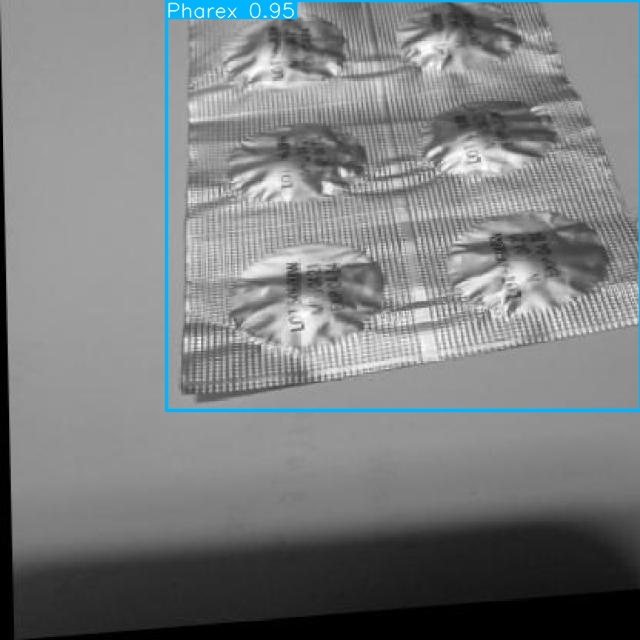

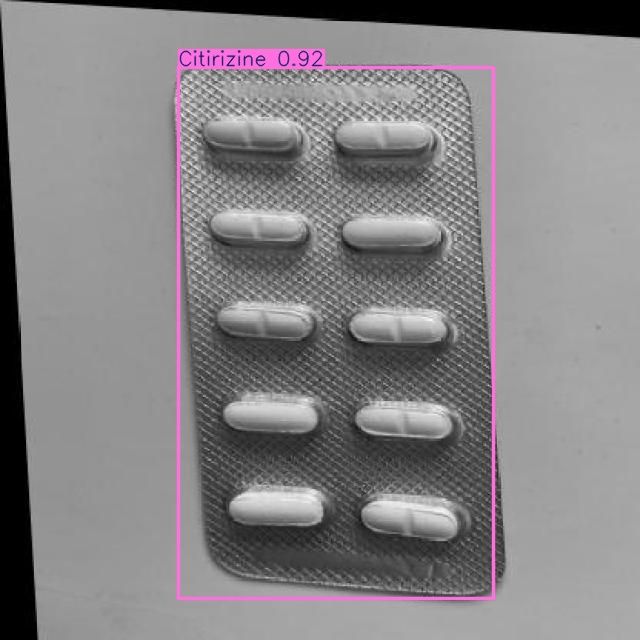

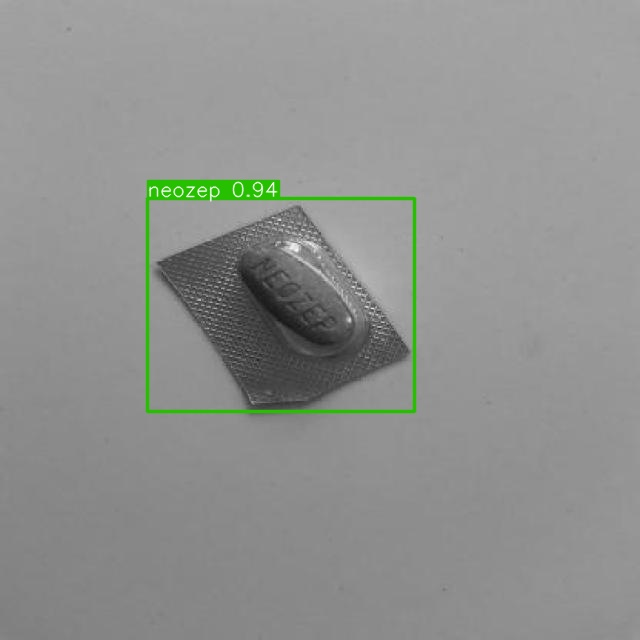

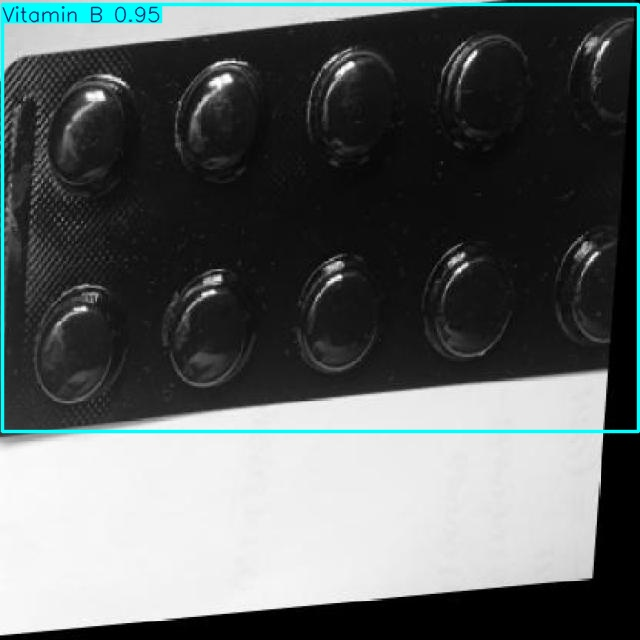

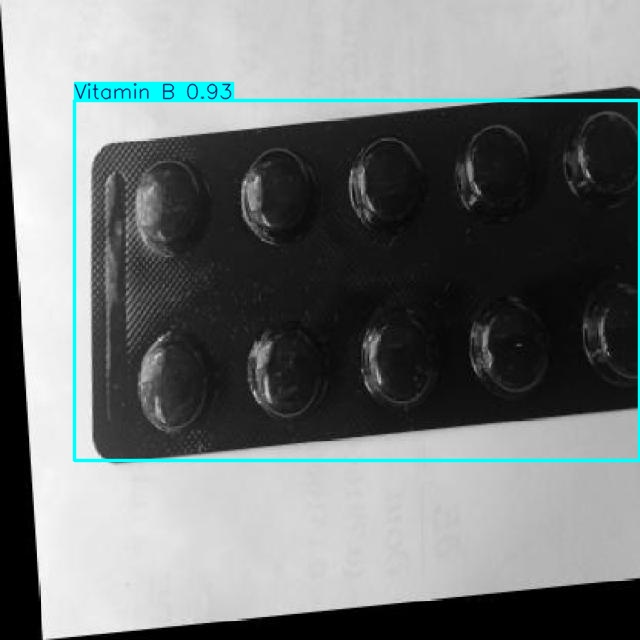

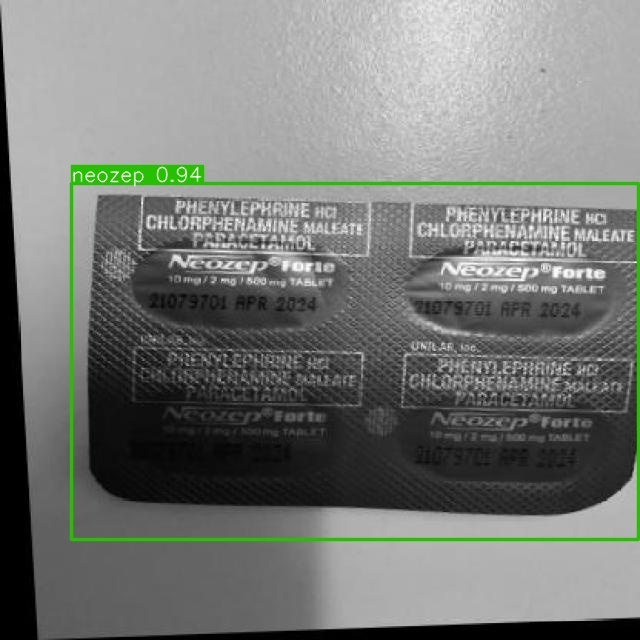

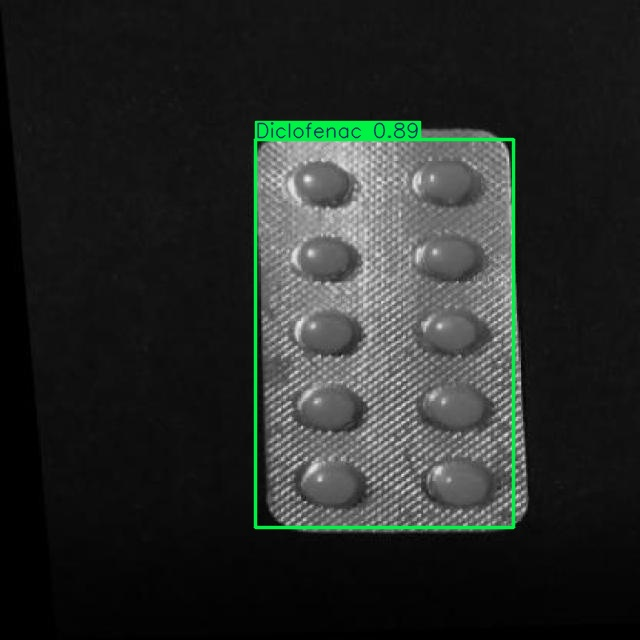

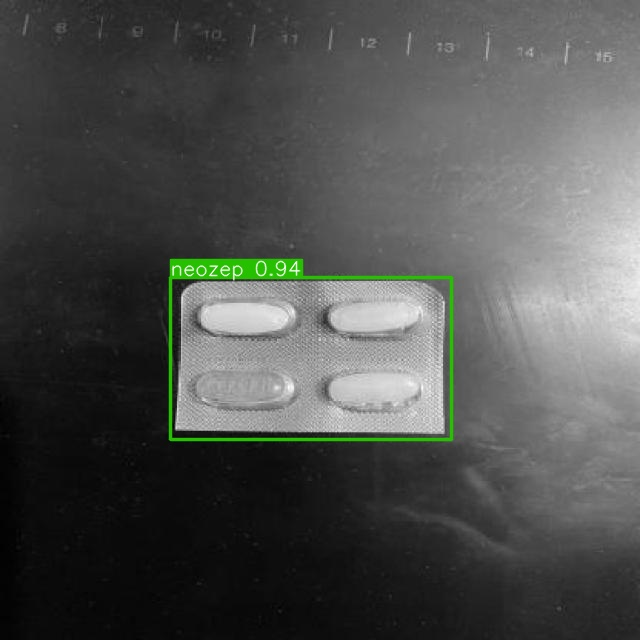

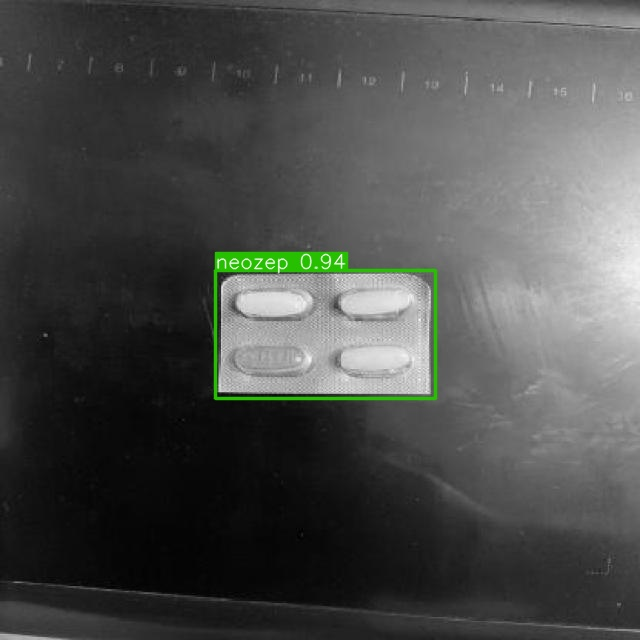

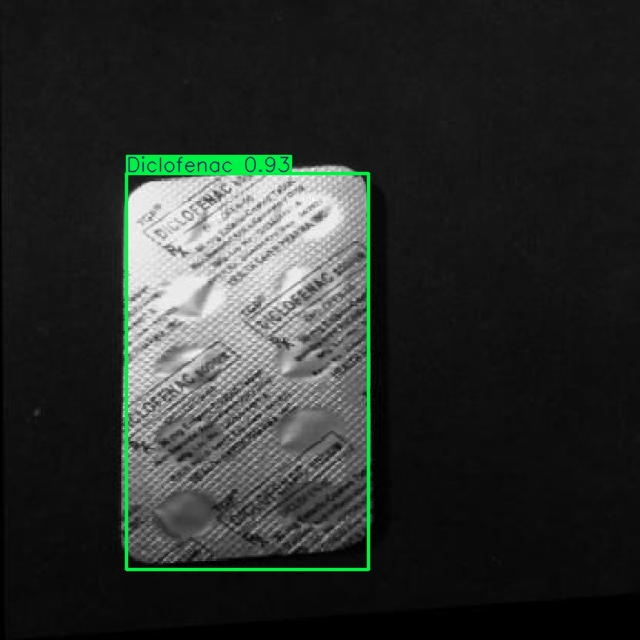

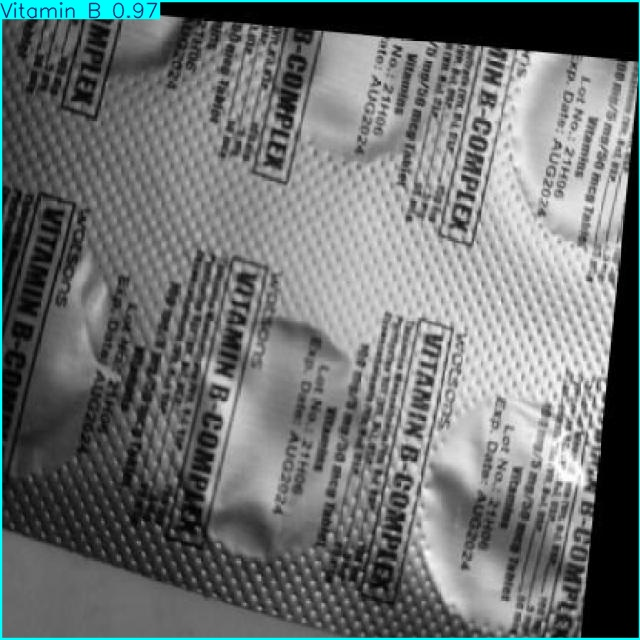

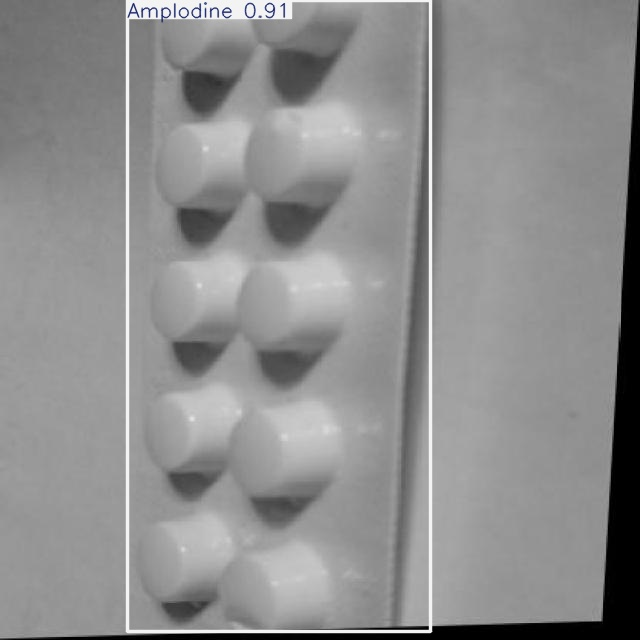

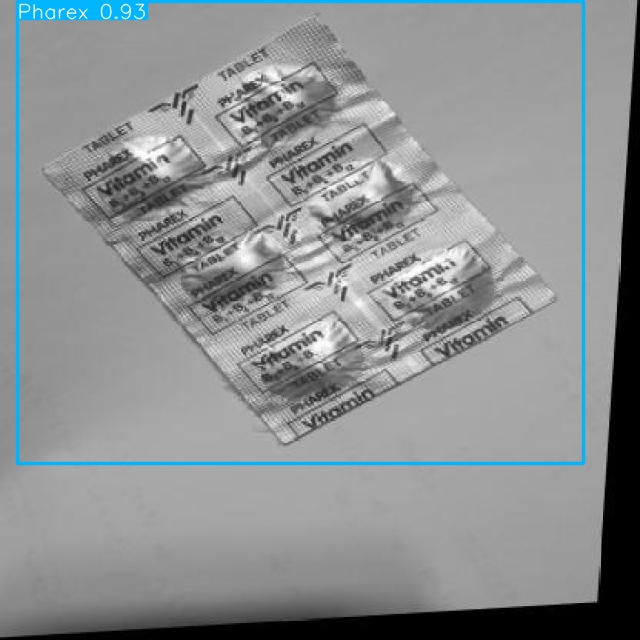

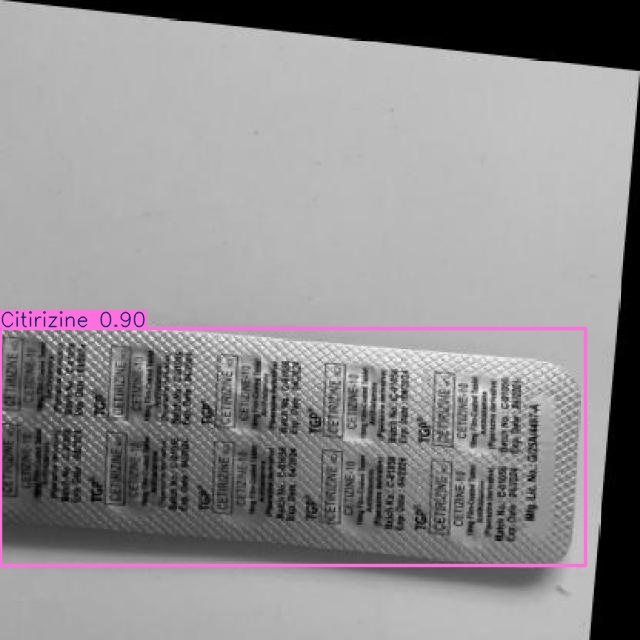

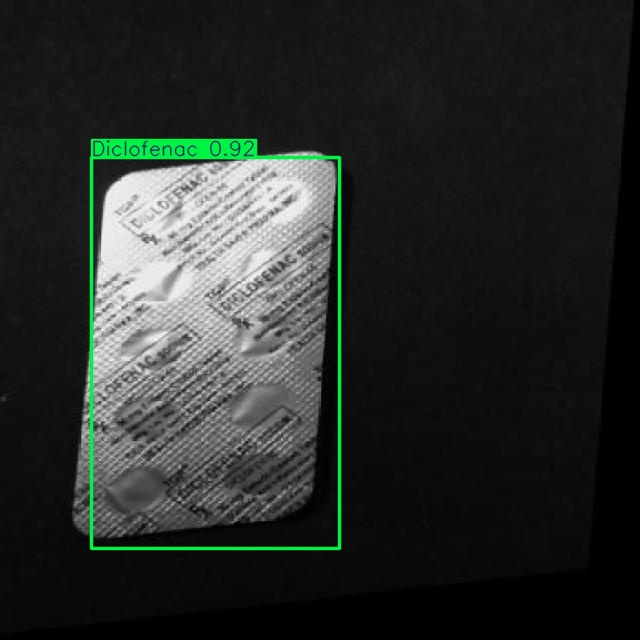

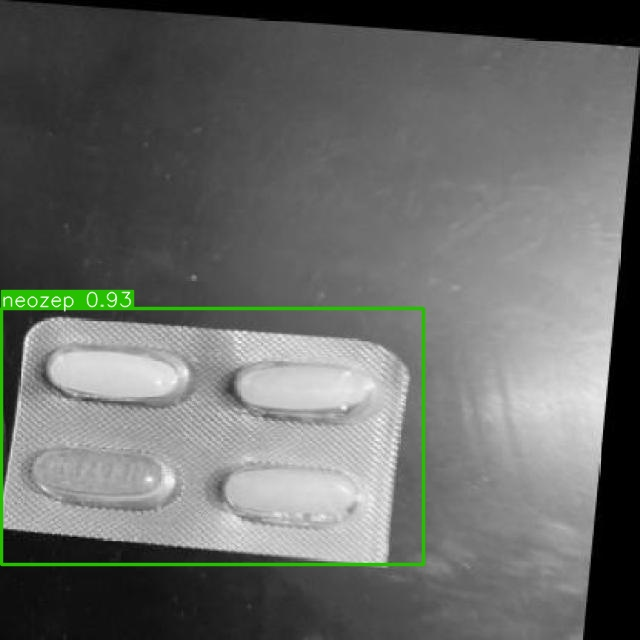

In [12]:
#testing
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[5:50]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [13]:
# deploying the model
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.99, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/123-hv3lu/common-pills-in-ph-detection/4
Share your model with the world at: https://universe.roboflow.com/123-hv3lu/common-pills-in-ph-detection/model/4


In [14]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))


In [15]:
download_file('/kaggle/working/runs', 'out')

/kaggle/working/out.zip